In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in the data and clean it up
df = pd.DataFrame()
dfs = []
sample_types = ['plant', 'rock', 'water']

for sample_type in sample_types:
    sample_df = pd.read_csv(f'{sample_type}.csv').set_index('Sample').transpose()
    sample_df['Sample type'] = sample_type
    dfs.append(sample_df)

for i in range(1, len(dfs)):
    dfs[i].columns = dfs[0].columns
df_groupie = pd.concat(dfs, keys=sample_types, names=['Sample type', 'Sample name'])
df = pd.concat(dfs)

In [3]:
grouped_by_location = df_groupie.groupby(by=lambda name: name[:2], level='Sample name')

In [4]:
import seaborn as sns

In [5]:
# Reset the index to use the groupby keys as a column
df_reset = df.reset_index()

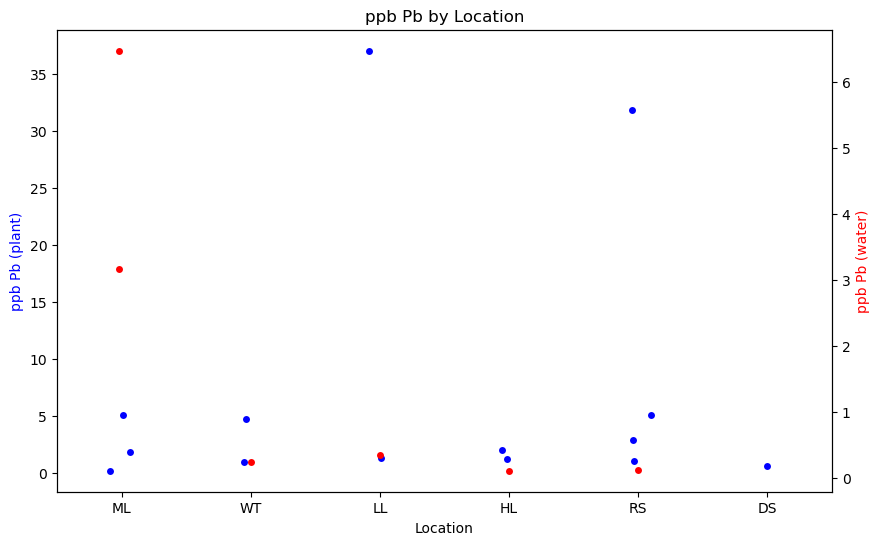

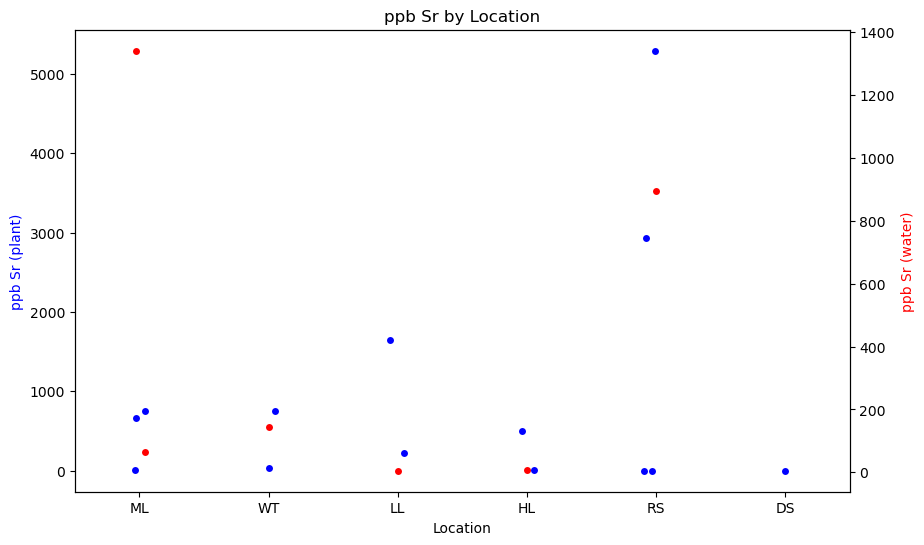

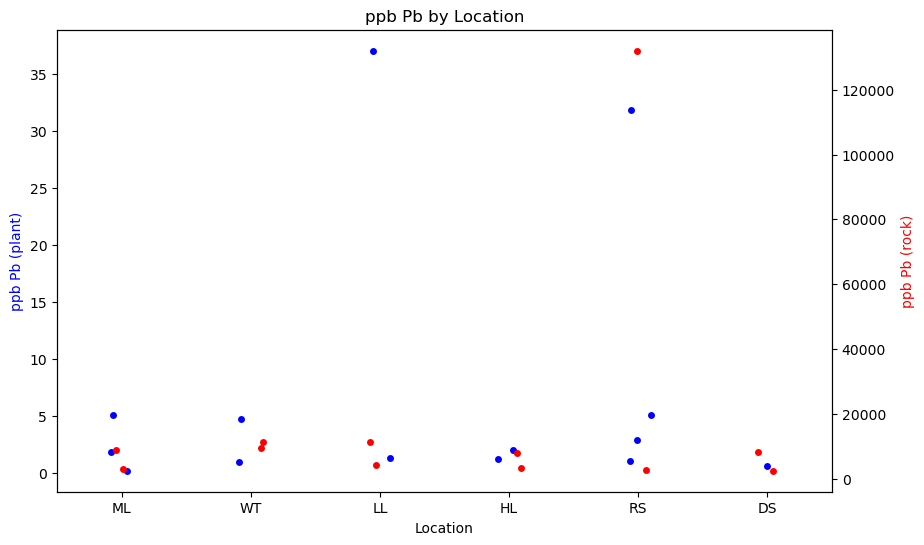

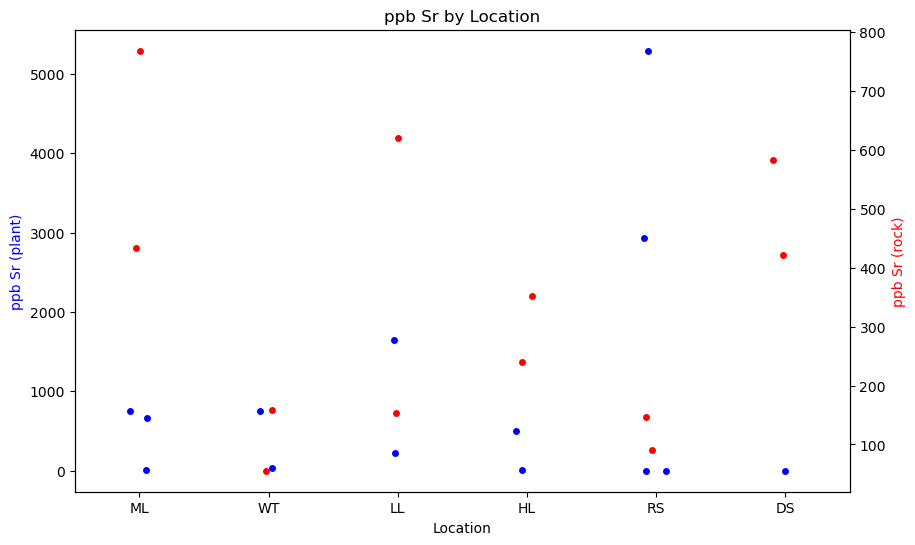

In [6]:
# Extract the location from the 'Sample name' for the x-axis
df_reset['Location'] = df_reset['index'].str[:2]

# Create the strip plots
for secondary in ['water', 'rock']:
    for metal in ['Pb', 'Sr']:
        fig = plt.figure(figsize=(10, 6))
        ax1 = sns.stripplot(x='Location', y=f'ppb {metal}', data=df_reset[df_reset['Sample type'] == 'plant'], jitter=True, color='blue')
        ax2 = ax1.twinx()
        sns.stripplot(x='Location', y=f'ppb {metal}', data=df_reset[df_reset['Sample type'] == f'{secondary}'], jitter=True, color='red', ax=ax2)
        ax1.set_ylabel(f'ppb {metal} (plant)', color='blue')
        ax2.set_ylabel(f'ppb {metal} ({secondary})', color='red')
        plt.title(f'ppb {metal} by Location')
        plt.xlabel('Location')
        plt.show()

In [7]:
from scipy.stats import spearmanr
stats = pd.DataFrame()
for secondary in ['water', 'rock']:
    for metal in ['Pb', 'Sr']:
        avg_levels = df_reset.groupby(['Location', 'Sample type'])[f'ppb {metal}'].mean().unstack()
        if secondary == 'water':
            avg_levels = avg_levels.dropna()
        correlation, p_value = spearmanr(avg_levels[f'{secondary}'], avg_levels['plant'])
        stats = pd.concat([stats, pd.DataFrame([{'metal': metal, 'secondary': secondary, 'correlation': correlation, 'p_value': p_value}])])

In [8]:
stats

,metal,secondary,correlation,p_value
0,Pb,water,0.300000,0.623838
0,Sr,water,0.400000,0.504632
0,Pb,rock,0.828571,0.041563
0,Sr,rock,-0.200000,0.704000
